In [1]:
import sys
import os

SCRIPT_DIR = os.path.dirname(os.path.abspath("."))
sys.path.append(os.path.dirname(SCRIPT_DIR))

from src import results
import importlib
import pathlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from src.plotting import plot_fill_between_mean_std,plot_fill_between_min_max
from src.plotting import plot_matrix_fill_between_mean_min_max,plot_matrix_fill_between_mean_std

Valores iniciais: 
- T_MIN=0.1
- T_MAX=6
- N_ITS=100
- EVAP_R=0.1
- ALPHA=1

In [2]:
folders = list(pathlib.Path("../../results/p_hat700/").glob("*_ants"))

In [3]:
folders

[PosixPath('../../results/p_hat700/25_ants'),
 PosixPath('../../results/p_hat700/30_ants'),
 PosixPath('../../results/p_hat700/35_ants'),
 PosixPath('../../results/p_hat700/10_ants'),
 PosixPath('../../results/p_hat700/20_ants'),
 PosixPath('../../results/p_hat700/15_ants'),
 PosixPath('../../results/p_hat700/40_ants')]

In [4]:
results_agg_per_run = dict()
for folder in folders:
    folder_name = str(folder).split("/")[-1]
    files_of_folder = list(folder.glob("*.csv"))
    results_agg = results.ResultsAgg()
    results_agg.agg_files(files_of_folder, delimiter=",")
    results_agg_per_run[folder_name] = results_agg

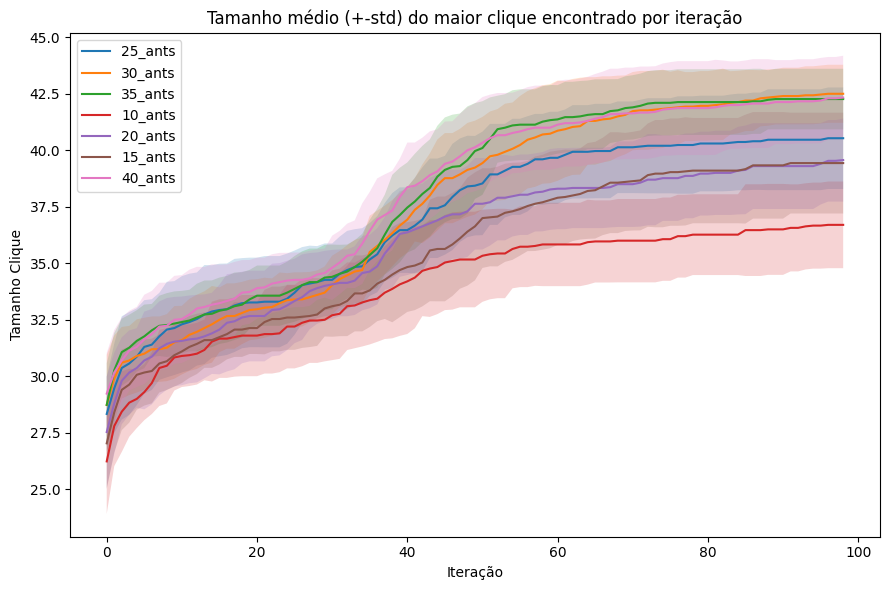

In [5]:
fig, ax = plt.subplots(figsize=(9, 6))
for run, results_agg in results_agg_per_run.items():
    # plot_matrix_fill_between_mean_min_max(list(results_agg.per_it_max_clique.values()), ax, run)
    plot_matrix_fill_between_mean_std(list(results_agg.per_it_max_clique.values()), ax, run)

ax.legend()
ax.set_ylabel("Tamanho Clique")
ax.set_xlabel("Iteração")
ax.set_title("Tamanho médio (+-std) do maior clique encontrado por iteração")
plt.savefig("./assets/p_hat_2_cliques_std.png")
fig.tight_layout()

Pelo gráfico acima, pode-se perceber que quanto mais formigas estão disponíveis, maior o clique final encontrado ao final. Além disso, também é possível ver que, ao usar mais formigas, encontra-se cliques maiores mais rapidamente. No caso, as execuções com 30, 35 e 40 formigas seguiram o mesmo movimento.

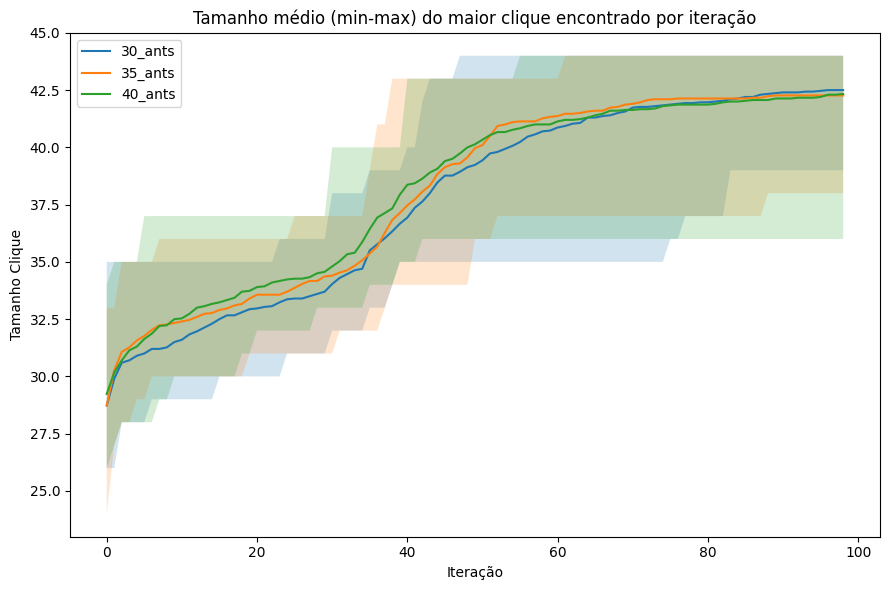

In [6]:
fig, ax = plt.subplots(figsize=(9, 6))
target_runs = ['30_ants', '35_ants', '40_ants']
target_runs_values = [(key, values) for key, values in results_agg_per_run.items() if key in target_runs]
for run, results_agg in target_runs_values:
    plot_matrix_fill_between_mean_min_max(list(results_agg.per_it_max_clique.values()), ax, run)

ax.legend()
ax.set_ylabel("Tamanho Clique")
ax.set_xlabel("Iteração")
ax.set_title("Tamanho médio (min-max) do maior clique encontrado por iteração")
plt.savefig("./assets/p_hat_2_cliques_min_max.png")
fig.tight_layout()

Olhando apenas para os três melhores parâmetros, vemos que todas elas conseguiram, no melhor caso, encontrar um clique com 44 nós. Entretanto, nos piores casos, para 40 e 35 formigas, temos cliques menores do que com 30 formigas. Dessa forma, vamos seguir com 30 formigas.

O maior clique encontrado foi: [119, 397, 562, 350, 608, 149, 106, 361, 76, 468, 581, 636, 513, 612, 292, 297, 584, 193, 345, 317, 393, 325, 115, 576, 579, 495, 212, 118, 678, 387, 323, 676, 15, 295, 122, 351, 54, 649, 373, 30, 354, 326, 667, 511]